In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
train = pd.read_csv("C:/Users/ACER/Downloads/Saikat_project/Sentiment Analysis/train_2kmZucJ.csv")

In [168]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [169]:
test = pd.read_csv("C:/Users/ACER/Downloads/Saikat_project/Sentiment Analysis/test_oJQbWVk.csv")

In [170]:
df = pd.concat([train,test])

In [171]:
df

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...
...,...,...,...
1948,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
1949,9870,NaN,Now Available - Hoodie. Check it out here - ht...
1950,9871,NaN,There goes a crack right across the screen. If...
1951,9872,NaN,@codeofinterest as i said #Adobe big time we m...


In [172]:
df.isnull().sum()

id          0
label    1953
tweet       0
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

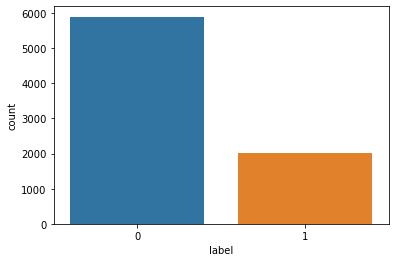

In [173]:
sns.countplot(x='label', data= train)

In [174]:
import re
import nltk

In [175]:
from nltk.corpus import stopwords

In [176]:
stop = stopwords.words('english') #preprocessing steps
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower().strip()
    text = ' '.join([i if i not in stop and i.isalpha() else '' for i in text.lower().split()])
    text = ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(text)])
    text = re.sub(r"\s{2,}", " ", text)
    return text

In [177]:
train['cleaned_tweet']=train['tweet'].apply(clean_text) #preprocessing steps
test['cleaned_tweet']= test['tweet'].apply(clean_text)
df['cleaned_tweet']= df['tweet'].apply(clean_text)

In [178]:
train

,id,label,tweet,cleaned_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love would go talk makememories unplug relax i...
3,4,0,I'm wired I know I'm George I was made that wa...,im wired know im george made way iphone cute d...
4,5,1,What amazing service! Apple won't even talk to...,amazing service apple wont even talk question ...
...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...,live loud lol liveoutloud selfie smile sony mu...
7916,7917,0,We would like to wish you an amazing day! Make...,would like wish amazing day make every minute ...
7917,7918,0,Helping my lovely 90 year old neighbor with he...,helping lovely year old neighbor ipad morning ...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...,finally got smart pocket wifi stay connected a...


In [179]:
test

,id,tweet,cleaned_tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...,hate new iphone upgrade wont let download apps...
1,7922,currently shitting my fucking pants. #apple #i...,currently shitting fucking pant apple imac cas...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",id like put cdroms ipad possible yes wouldnt b...
3,7924,My ipod is officially dead. I lost all my pict...,ipod officially dead lost picture video concer...
4,7925,Been fighting iTunes all night! I only want th...,fighting itunes night want music paid
...,...,...,...
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",explodes burn thanks rushing product market sa...
1949,9870,Now Available - Hoodie. Check it out here - ht...,available hoodie check iphone case music discount
1950,9871,There goes a crack right across the screen. If...,go crack right across screen could actually pr...
1951,9872,@codeofinterest as i said #Adobe big time we m...,codeofinterest said adobe big time may well in...


In [180]:
df

,id,label,tweet,cleaned_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love would go talk makememories unplug relax i...
3,4,0.0,I'm wired I know I'm George I was made that wa...,im wired know im george made way iphone cute d...
4,5,1.0,What amazing service! Apple won't even talk to...,amazing service apple wont even talk question ...
...,...,...,...,...
1948,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",explodes burn thanks rushing product market sa...
1949,9870,NaN,Now Available - Hoodie. Check it out here - ht...,available hoodie check iphone case music discount
1950,9871,NaN,There goes a crack right across the screen. If...,go crack right across screen could actually pr...
1951,9872,NaN,@codeofinterest as i said #Adobe big time we m...,codeofinterest said adobe big time may well in...


In [181]:
from sklearn.model_selection import train_test_split

In [182]:
label= pd.get_dummies(train['label']).values

In [183]:
X_train,X_val,y_train,y_val=train_test_split(train['cleaned_tweet'], label, test_size=0.33, random_state=42)

In [184]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [185]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = train['cleaned_tweet'].map(len).max()
EMBEDDING_DIM = 50
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(X_train.values)
word_index_whole = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index_whole))
print('Max len:', MAX_SEQUENCE_LENGTH)

Found 12178 unique tokens.
Max len: 319


In [186]:
size_of_vocabulary=len(word_index_whole) + 1 #+1 for padding
print(size_of_vocabulary)

12179


In [187]:
# def get_embedding_matrix(typeToLoad):
#     if typeToLoad == "glove":
#         EMBEDDING_FILE="C:/Users/ACER/Downloads/Saikat_project/Shopee/glove.twitter.27B.100d.txt"
#         embed_size = 100    
#     if typeToLoad == "glove" or typeToLoad == "fasttext":
#         embeddings_index = dict()
#         f = open(EMBEDDING_FILE,encoding="utf8")

#         for line in f:
#             values = line.split()
#             word = values[0]
#             coefs = np.asarray(values[1:], dtype='float32')
#             embeddings_index[word] = coefs

#         f.close()
#         print('Loaded %s word vectors.' % len(embeddings_index))
    

#         embedding_matrix = np.zeros((size_of_vocabulary, 100))
#         embeddedCount = 0
#         for word, i in tokenizer.word_index.items():
#             i-=1
#             embedding_vector = embeddings_index.get(word)
#             if embedding_vector is not None: 
#                 embedding_matrix[i] = embedding_vector
#                 embeddedCount+=1
            
        
#         return embedding_matrix

In [188]:
# glove_embedding_matrix = get_embedding_matrix("glove")

In [189]:
X_tweet_train = tokenizer.texts_to_sequences(X_train.values)
X_tweet_train = pad_sequences(X_tweet_train, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train tensor:', X_tweet_train.shape)

Shape of train tensor: (5306, 319)


In [190]:
X_tweet_val = tokenizer.texts_to_sequences(X_val.values)
X_tweet_val = pad_sequences(X_tweet_val, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of Validation tensor:', X_tweet_val.shape)

Shape of Validation tensor: (2614, 319)


In [191]:
print(y_train.shape)
print(y_val.shape)

(5306, 2)
(2614, 2)


In [207]:
y_train

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [193]:
X_tweet_train.shape[1]

319

In [194]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [195]:
# def compile_model(embedding_matrix):
#     lstm_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
#     x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], mask_zero=True, input_length=MAX_SEQUENCE_LENGTH, trainable=False)(lstm_input)
#     x = Dropout(0.3)(x)
#     x = LSTM(64, return_sequences = True)(x)
#     x = Dropout(0.3)(x)
#     x = LSTM(64)(x)
#     x = Dropout(0.3)(x)
#     lstm_out = Dense(18, activation = 'relu')(x)
#     z = Dense(256, activation='relu')(lstm_out)
#     z = Dropout(0.3)(z)
#     z = Dense(128, activation='relu')(z)
#     z = Dropout(0.3)(z)
#     output = Dense(train['label'].shape[1], activation='sigmoid')(z)

#     model = Model(inputs=[cnn_input, lstm_input], outputs=[output])
#     adam = Adam(lr=0.001, decay=1e-5)
  
#     model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#     return model

In [196]:
embed_dim = 319
lstm_out = 196
max_fatures = 2000
model = Sequential()
model.add(Embedding(size_of_vocabulary, EMBEDDING_DIM, input_length=X_tweet_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 319, 50)           608950    
_________________________________________________________________
spatial_dropout1d_9 (Spatial (None, 319, 50)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 196)               193648    
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 394       
Total params: 802,992
Trainable params: 802,992
Non-trainable params: 0
_________________________________________________________________
None


In [197]:
batch_size = 100
model.fit(X_tweet_train, y_train,validation_data=(X_tweet_val,y_val), epochs = 7, batch_size=batch_size)

Epoch 1/7
54/54 [==============================] - 97s 2s/step - loss: 0.6081 - accuracy: 0.7327 - val_loss: 0.3857 - val_accuracy: 0.8229
Epoch 2/7
54/54 [==============================] - 88s 2s/step - loss: 0.3097 - accuracy: 0.8639 - val_loss: 0.2696 - val_accuracy: 0.8780
Epoch 3/7
54/54 [==============================] - 89s 2s/step - loss: 0.1832 - accuracy: 0.9305 - val_loss: 0.2704 - val_accuracy: 0.8833
Epoch 4/7
54/54 [==============================] - 88s 2s/step - loss: 0.1426 - accuracy: 0.9460 - val_loss: 0.2725 - val_accuracy: 0.8837
Epoch 5/7
54/54 [==============================] - 89s 2s/step - loss: 0.0863 - accuracy: 0.9705 - val_loss: 0.3107 - val_accuracy: 0.8730
Epoch 6/7
54/54 [==============================] - 89s 2s/step - loss: 0.0816 - accuracy: 0.9758 - val_loss: 0.3401 - val_accuracy: 0.8783
Epoch 7/7
54/54 [==============================] - 90s 2s/step - loss: 0.0530 - accuracy: 0.9827 - val_loss: 0.3876 - val_accuracy: 0.8738


In [198]:
X_test = tokenizer.texts_to_sequences(test['cleaned_tweet'].values)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train tensor:', X_test.shape)

Shape of train tensor: (1953, 319)


In [200]:
predict=model.predict(X_test,verbose=1)

62/62 [==============================] - 6s 101ms/step


In [203]:
predict

array([[4.5719258e-03, 9.9542809e-01],
       [1.3360194e-02, 9.8663980e-01],
       [2.7283341e-02, 9.7271663e-01],
       ...,
       [3.8922451e-02, 9.6107757e-01],
       [4.9489759e-02, 9.5051020e-01],
       [9.9954623e-01, 4.5371521e-04]], dtype=float32)

In [220]:
pred_labels = np.where(predict > 0.5, 1,0)
pred_labels

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [221]:
b=[]
for i in pred_labels:
    b.append(str(np.argmax(i)))
label=pd.DataFrame(b)

In [222]:
label

,0
0,1
1,1
2,1
3,1
4,1
...,...
1948,1
1949,0
1950,1
1951,1


In [223]:
test.head()

,id,tweet,cleaned_tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...,hate new iphone upgrade wont let download apps...
1,7922,currently shitting my fucking pants. #apple #i...,currently shitting fucking pant apple imac cas...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",id like put cdroms ipad possible yes wouldnt b...
3,7924,My ipod is officially dead. I lost all my pict...,ipod officially dead lost picture video concer...
4,7925,Been fighting iTunes all night! I only want th...,fighting itunes night want music paid


In [232]:
submission = pd.DataFrame({'id':[],'label':[]})

In [234]:
submission['id']=test['id']

In [235]:
submission['label']=label 


In [236]:
submission

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1
...,...,...
1948,9869,1
1949,9870,0
1950,9871,1
1951,9872,1


In [237]:
submission.to_csv("submission.csv",index=False)